In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

In [2]:
from google.colab import drive # untuk menghubungkan ke dalam drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
infected = os.listdir('/content/drive/MyDrive/Jambu Biji/') 
uninfected = os.listdir('/content/drive/MyDrive/Sirih/')

In [4]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("/content/drive/MyDrive/Jambu Biji/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("/content/drive/MyDrive/Sirih/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [5]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [6]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (350, 50, 50, 3) | labels : (350,)


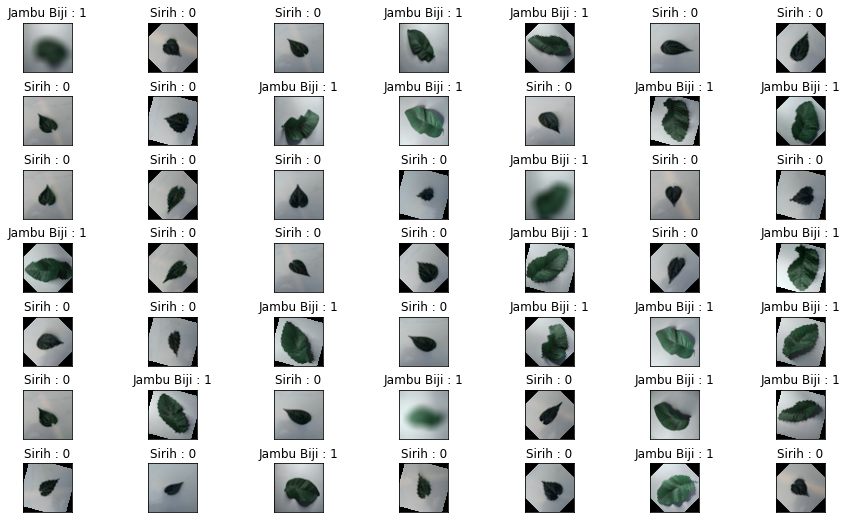

In [7]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Jambu Biji' if labels[r[0]] == 1 else 'Sirih' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

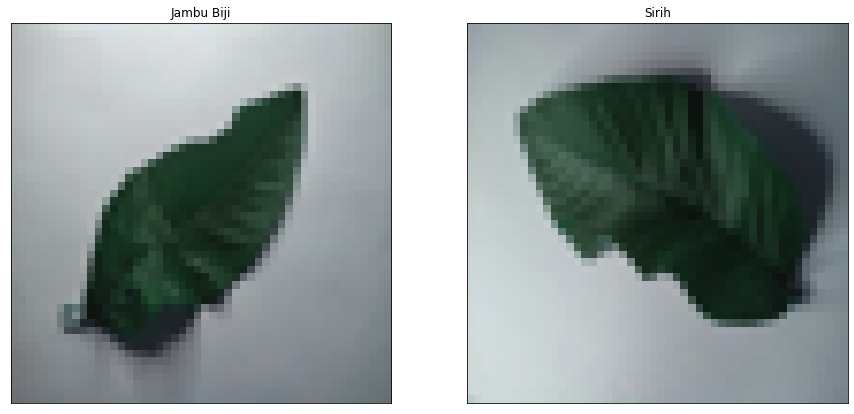

In [8]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Jambu Biji')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[76])
plt.title('Sirih')
plt.xticks([]) , plt.yticks([])

plt.show()

In [9]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [10]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [11]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

In [12]:
print('train data shape {} ,eval data shape {} , test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

train data shape (280, 50, 50, 3) ,eval data shape (35, 50, 50, 3) , test data shape (35, 50, 50, 3)


In [13]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalMaxPool2D, Conv2D, MaxPool2D, Flatten


# Feature Extraction Layer
model1 = Sequential()
model1.add(InputLayer(input_shape = [50,50,3]))
# model1.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(GlobalMaxPool2D())
model1.add(Flatten())

# Fully Connected Layer

model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# Summary Scenario Pertama

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

In [14]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
Sc1 = model1.fit(test_x, test_y, batch_size=32, epochs=50, validation_data=(eval_x, eval_y))

Epoch 1/50
2/2 [==============================] - 1s 251ms/step - loss: 0.6874 - acc: 0.6000 - val_loss: 0.6930 - val_acc: 0.4857
Epoch 2/50
2/2 [==============================] - 0s 64ms/step - loss: 0.6701 - acc: 0.6000 - val_loss: 0.6829 - val_acc: 0.6286
Epoch 3/50
2/2 [==============================] - 0s 60ms/step - loss: 0.6720 - acc: 0.7714 - val_loss: 0.6777 - val_acc: 0.5143
Epoch 4/50
2/2 [==============================] - 0s 68ms/step - loss: 0.6890 - acc: 0.4000 - val_loss: 0.6778 - val_acc: 0.5143
Epoch 5/50
2/2 [==============================] - 0s 61ms/step - loss: 0.6985 - acc: 0.4000 - val_loss: 0.6745 - val_acc: 0.5143
Epoch 6/50
2/2 [==============================] - 0s 63ms/step - loss: 0.6925 - acc: 0.4000 - val_loss: 0.6704 - val_acc: 0.5143
Epoch 7/50
2/2 [==============================] - 0s 59ms/step - loss: 0.6792 - acc: 0.4571 - val_loss: 0.6682 - val_acc: 0.8000
Epoch 8/50
2/2 [==============================] - 0s 61ms/step - loss: 0.6665 - acc: 0.7429 - va

In [16]:
from sklearn.metrics import classification_report

pred = model1.predict(eval_x)
labels = (pred > 0.5).astype(np.int)

print(classification_report(eval_y, labels))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        18

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



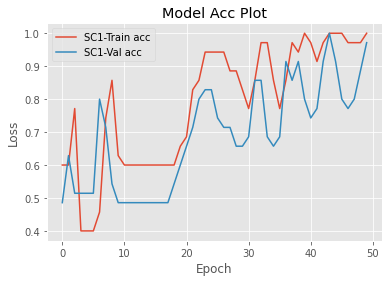

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,50), Sc1.history["acc"], label="SC1-Train acc")
plt.plot(np.arange(0,50), Sc1.history["val_acc"], label="SC1-Val acc")
plt.title("Model Acc Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()